In [ ]:
# Cell 1: Cài đặt
!pip install fiftyone pillow

# Restart runtime (cần thiết)
import os
os.kill(os.getpid(), 9)

In [ ]:
# Cell 2: Import thư viện
import fiftyone as fo
import fiftyone.zoo as foz
import os

print("✅ Đã import thư viện!")
print(f"📦 FiftyOne version: {fo.__version__}")

✅ Đã import thư viện!
📦 FiftyOne version: 1.10.0


In [ ]:
# Cell 3: Danh sách nguyên liệu
CLASSES_NGUYEN_LIEU = [
    # Rau củ
    "Tomato", "Carrot", "Cabbage", "Cucumber", "Potato",
    "Pumpkin", "Mushroom", "Broccoli", "Bell pepper", "Zucchini",

    # Trái cây
    "Apple", "Banana", "Orange", "Lemon", "Strawberry",
    "Watermelon", "Grape", "Mango", "Pineapple", "Pomegranate",

    # Thịt & hải sản
    "Chicken", "Fish", "Shrimp", "Crab", "Lobster",

    # Khác
    "Egg", "Cheese", "Bread", "Milk"
]

print(f"📊 Sẽ download {len(CLASSES_NGUYEN_LIEU)} classes")
print("Classes:", CLASSES_NGUYEN_LIEU)

📊 Sẽ download 29 classes
Classes: ['Tomato', 'Carrot', 'Cabbage', 'Cucumber', 'Potato', 'Pumpkin', 'Mushroom', 'Broccoli', 'Bell pepper', 'Zucchini', 'Apple', 'Banana', 'Orange', 'Lemon', 'Strawberry', 'Watermelon', 'Grape', 'Mango', 'Pineapple', 'Pomegranate', 'Chicken', 'Fish', 'Shrimp', 'Crab', 'Lobster', 'Egg', 'Cheese', 'Bread', 'Milk']


In [ ]:
# Cell 4: Download dataset
dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["detections"],
    classes=CLASSES_NGUYEN_LIEU,
    max_samples=30,  # 30 ảnh/class
    shuffle=True,
    seed=51
)

print(f"✅ Đã download {len(dataset)} ảnh!")
print(f"📊 Thống kê:")
dataset.count_values("ground_truth.detections.label")

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v7/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/root/fiftyone/open-images-v7/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [30.8s elapsed, 0s remaining, 169.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [30.8s elapsed, 0s remaining, 169.2Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v7/train/metadata/classes.csv'


Ignoring invalid classes ['Egg']
You can view the available classes via `fiftyone.utils.openimages.get_classes()`


You can view the available classes via `fiftyone.utils.openimages.get_classes()`


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpjasc6qhq/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv' to '/root/fiftyone/open-images-v7/train/labels/detections.csv'


INFO:fiftyone.utils.openimages:Downloading 30 images


 100% |█████████████████████| 30/30 [9.9s elapsed, 0s remaining, 3.8 files/s]      


INFO:eta.core.utils: 100% |█████████████████████| 30/30 [9.9s elapsed, 0s remaining, 3.8 files/s]      


Dataset info written to '/root/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


Ignoring invalid classes ['Egg']
You can view the available classes via `fiftyone.utils.openimages.get_classes()`


You can view the available classes via `fiftyone.utils.openimages.get_classes()`


 100% |███████████████████| 30/30 [158.5ms elapsed, 0s remaining, 193.6 samples/s]    


INFO:eta.core.utils: 100% |███████████████████| 30/30 [158.5ms elapsed, 0s remaining, 193.6 samples/s]    


Dataset 'open-images-v7-train-30' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-30' created


✅ Đã download 30 ảnh!
📊 Thống kê:


{'Bread': 7,
 'Snack': 8,
 'Grape': 10,
 'Clothing': 2,
 'Cabbage': 1,
 'Fast food': 1,
 'Lemon': 4,
 'Fish': 7,
 'Mixing bowl': 1,
 'Watermelon': 1,
 'Baked goods': 4,
 'Pumpkin': 3,
 'Strawberry': 5,
 'Poster': 1,
 'Flower': 6,
 'Chicken': 4,
 'Crab': 1,
 'Mushroom': 10,
 'Orange': 6,
 'Human face': 1,
 'Flowerpot': 1,
 'Person': 1,
 'Potato': 3,
 'Plant': 7,
 'Tomato': 27,
 'Man': 1,
 'Dessert': 6,
 'Woman': 1,
 'Salad': 1,
 'Fruit': 4,
 'Cheese': 4,
 'Houseplant': 1}

In [ ]:
# Cell 5: Xem thống kê dataset
print(f"📊 Tổng số ảnh: {len(dataset)}")
print(f"📦 Số classes: {len(dataset.distinct('ground_truth.detections.label'))}")

# Xem số lượng ảnh mỗi class
print("\n🔢 Số lượng ảnh mỗi class:")
counts = dataset.count_values("ground_truth.detections.label")
for class_name, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {class_name}: {count} ảnh")

# Xem 1 ảnh mẫu
print(f"\n📸 Ảnh mẫu đầu tiên: {dataset.first().filepath}")

📊 Tổng số ảnh: 30
📦 Số classes: 32

🔢 Số lượng ảnh mỗi class:
  Tomato: 27 ảnh
  Grape: 10 ảnh
  Mushroom: 10 ảnh
  Snack: 8 ảnh
  Bread: 7 ảnh
  Fish: 7 ảnh
  Plant: 7 ảnh
  Flower: 6 ảnh
  Orange: 6 ảnh
  Dessert: 6 ảnh
  Strawberry: 5 ảnh
  Lemon: 4 ảnh
  Baked goods: 4 ảnh
  Chicken: 4 ảnh
  Fruit: 4 ảnh
  Cheese: 4 ảnh
  Pumpkin: 3 ảnh
  Potato: 3 ảnh
  Clothing: 2 ảnh
  Cabbage: 1 ảnh
  Fast food: 1 ảnh
  Mixing bowl: 1 ảnh
  Watermelon: 1 ảnh
  Poster: 1 ảnh
  Crab: 1 ảnh
  Human face: 1 ảnh
  Flowerpot: 1 ảnh
  Person: 1 ảnh
  Man: 1 ảnh
  Woman: 1 ảnh
  Salad: 1 ảnh
  Houseplant: 1 ảnh

📸 Ảnh mẫu đầu tiên: /root/fiftyone/open-images-v7/train/data/a11bba096189373c.jpg


In [ ]:
# Cell 6 Alternative: Chia dataset trước khi export
export_dir = "/content/yolo_dataset"

print("🔄 Đang chia dataset train/val/test...")

# Chia dataset: 70% train, 20% val, 10% test
import fiftyone.utils.random as four

four.random_split(
    dataset,
    {"train": 0.7, "val": 0.2, "test": 0.1}
)

print(f"📊 Train: {len(dataset.match_tags('train'))} ảnh")
print(f"📊 Val: {len(dataset.match_tags('val'))} ảnh")
print(f"📊 Test: {len(dataset.match_tags('test'))} ảnh")

# Export từng split riêng
print("\n🔄 Đang export...")

# Export train
train_view = dataset.match_tags("train")
train_view.export(
    export_dir=f"{export_dir}/train",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth"
)

# Export val
val_view = dataset.match_tags("val")
val_view.export(
    export_dir=f"{export_dir}/val",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth"
)

# Export test
test_view = dataset.match_tags("test")
test_view.export(
    export_dir=f"{export_dir}/test",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth"
)

print("✅ Đã export xong!")

# Tạo file data.yaml thủ công
import yaml

data_yaml = {
    'path': export_dir,
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': len(CLASSES_NGUYEN_LIEU),
    'names': {i: name for i, name in enumerate(CLASSES_NGUYEN_LIEU)}
}

with open(f'{export_dir}/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("\n📄 File data.yaml:")
!cat {export_dir}/data.yaml

🔄 Đang chia dataset train/val/test...
📊 Train: 30 ảnh
📊 Val: 6 ảnh
📊 Test: 3 ảnh

🔄 Đang export...
 100% |███████████████████| 30/30 [141.5ms elapsed, 0s remaining, 212.0 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 30/30 [141.5ms elapsed, 0s remaining, 212.0 samples/s]     


 100% |█████████████████████| 6/6 [21.9ms elapsed, 0s remaining, 274.3 samples/s] 


INFO:eta.core.utils: 100% |█████████████████████| 6/6 [21.9ms elapsed, 0s remaining, 274.3 samples/s] 


 100% |█████████████████████| 3/3 [19.1ms elapsed, 0s remaining, 157.2 samples/s] 


INFO:eta.core.utils: 100% |█████████████████████| 3/3 [19.1ms elapsed, 0s remaining, 157.2 samples/s] 


✅ Đã export xong!

📄 File data.yaml:
names:
  0: Tomato
  1: Carrot
  2: Cabbage
  3: Cucumber
  4: Potato
  5: Pumpkin
  6: Mushroom
  7: Broccoli
  8: Bell pepper
  9: Zucchini
  10: Apple
  11: Banana
  12: Orange
  13: Lemon
  14: Strawberry
  15: Watermelon
  16: Grape
  17: Mango
  18: Pineapple
  19: Pomegranate
  20: Chicken
  21: Fish
  22: Shrimp
  23: Crab
  24: Lobster
  25: Egg
  26: Cheese
  27: Bread
  28: Milk
nc: 29
path: /content/yolo_dataset
test: test/images
train: train/images
val: val/images


In [ ]:
# Cell 7: Cài YOLOv8
!pip install ultralytics -q

from ultralytics import YOLO
import torch

print(f"✅ Đã cài ultralytics!")
print(f"💻 GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🎮 GPU name: {torch.cuda.get_device_name(0)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Đã cài ultralytics!
💻 GPU available: True
🎮 GPU name: Tesla T4


In [ ]:
# Cell 8: Train model
from ultralytics import YOLO

# Load pretrained model
print("🔄 Đang load YOLOv8 nano pretrained model...")
model = YOLO('yolov8n.pt')  # n = nano (nhỏ, nhanh)

print("🚀 Bắt đầu training...")
print("⏰ Thời gian dự kiến: 1-2 giờ")
print("☕ Đi uống cà phê nhé!\n")

# Train
results = model.train(
    data=f'{export_dir}/data.yaml',
    epochs=50,              # 50 epochs
    imgsz=640,              # Kích thước ảnh
    batch=16,               # Batch size cho GPU free
    name='food_ingredients',
    patience=10,            # Early stopping nếu không cải thiện
    device=0,               # GPU
    workers=2,
    project='runs/detect',
    save=True,
    plots=True              # Tạo biểu đồ
)

print("\n🎉 Training hoàn tất!")
print(f"📊 Best model: runs/detect/food_ingredients/weights/best.pt")

🔄 Đang load YOLOv8 nano pretrained model...
🚀 Bắt đầu training...
⏰ Thời gian dự kiến: 1-2 giờ
☕ Đi uống cà phê nhé!

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=food_ingredients, nb

🔍 Tìm ảnh test...
📊 Tìm thấy 39 ảnh

🧪 Testing với 5 ảnh...

📸 Testing: /content/yolo_dataset/val/images/val/6aec0743f35febcc.jpg

image 1/1 /content/yolo_dataset/val/images/val/6aec0743f35febcc.jpg: 480x640 (no detections), 158.1ms
Speed: 14.2ms preprocess, 158.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict
  ⚠️ Không phát hiện nguyên liệu nào

📸 Testing: /content/yolo_dataset/val/images/val/158edd318592703c.jpg

image 1/1 /content/yolo_dataset/val/images/val/158edd318592703c.jpg: 480x640 (no detections), 36.9ms
Speed: 5.4ms preprocess, 36.9ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict
  ⚠️ Không phát hiện nguyên liệu nào

📸 Testing: /content/yolo_dataset/val/images/val/bba8bae128437caf.jpg

image 1/1 /content/yolo_dataset/val/images/val/bba8bae128437caf.jpg: 448x640 (no detections), 144.7ms
Speed: 14.8ms preprocess, 144.7ms inference, 3.1ms postproce

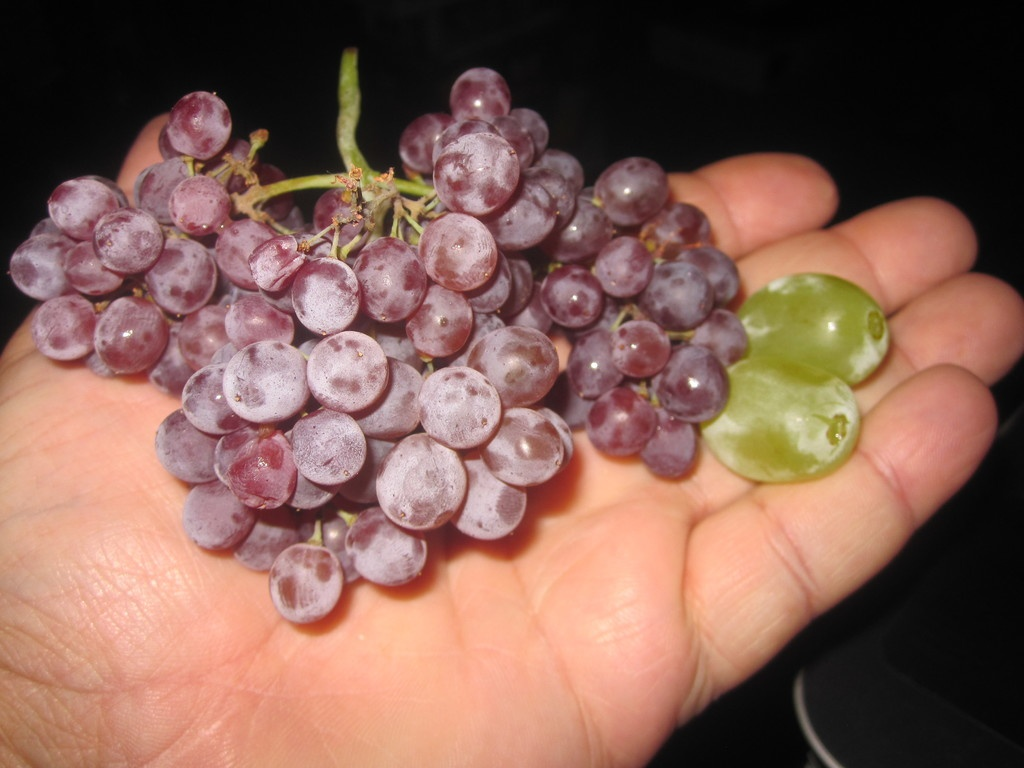

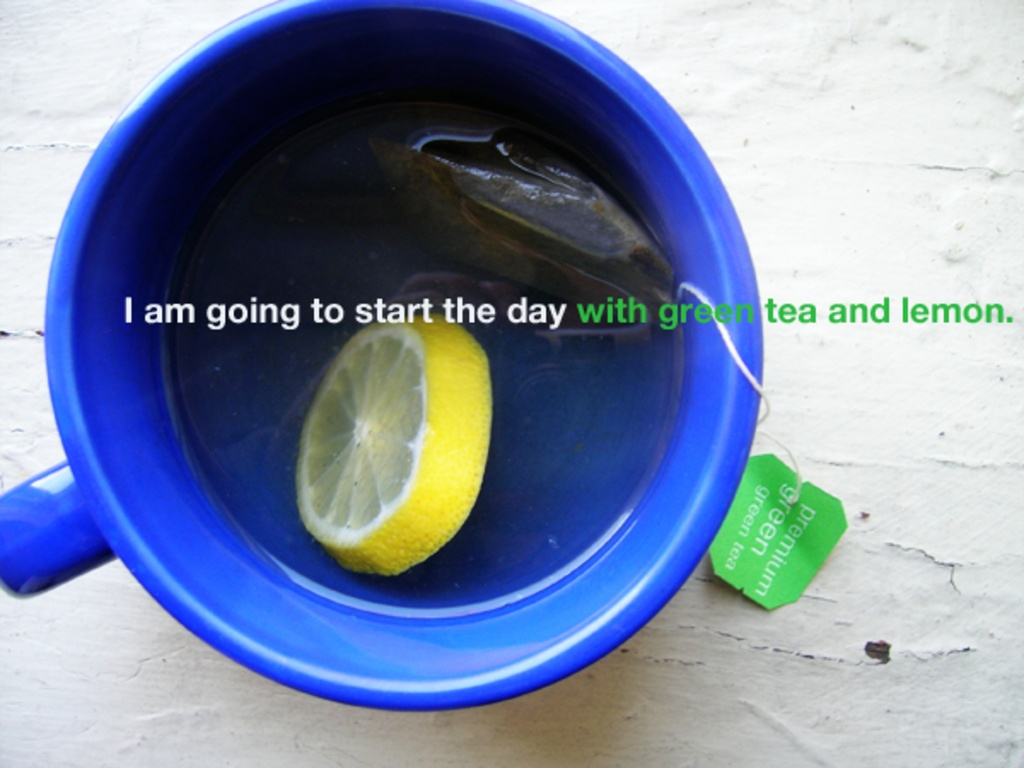

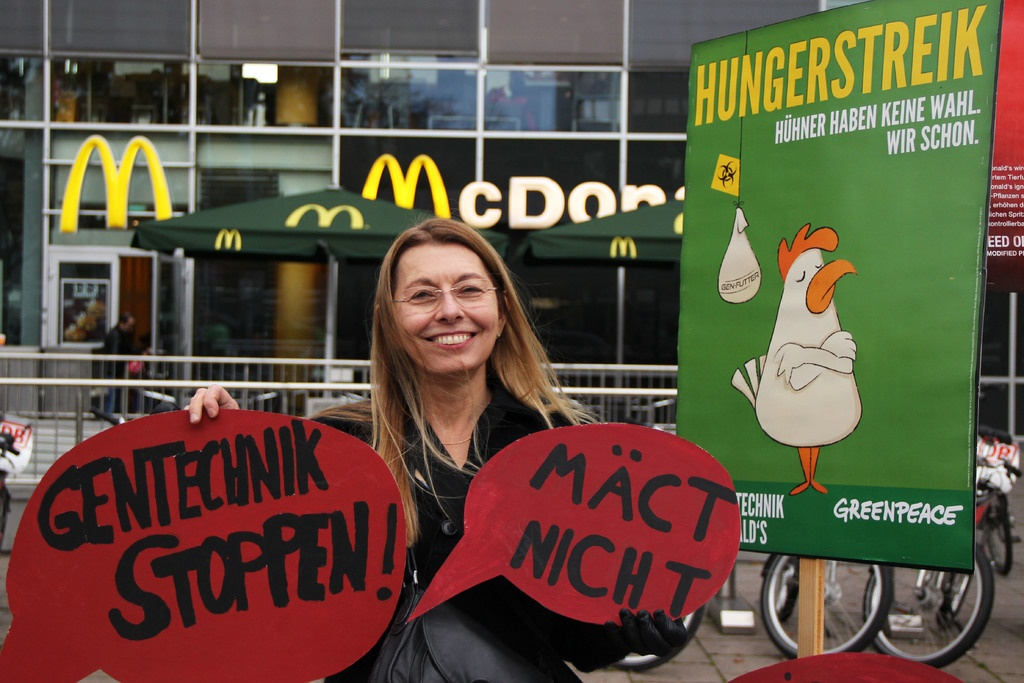

In [ ]:
# Cell 9 Alternative: Test với 1 ảnh
from ultralytics import YOLO
from IPython.display import Image, display
import glob

# Load model
best_model = YOLO('runs/detect/food_ingredients/weights/best.pt')

# Tìm 1 ảnh bất kỳ trong dataset
print("🔍 Tìm ảnh test...")
all_images = glob.glob(f'{export_dir}/**/*.jpg', recursive=True)
print(f"📊 Tìm thấy {len(all_images)} ảnh")

if len(all_images) > 0:
    # Test với 5 ảnh đầu tiên
    test_images = all_images[:5]

    print(f"\n🧪 Testing với {len(test_images)} ảnh...")

    for img_path in test_images:
        print(f"\n📸 Testing: {img_path}")

        # Predict
        results = best_model.predict(
            source=img_path,
            save=True,
            conf=0.3
        )

        # In kết quả
        for r in results:
            if len(r.boxes) > 0:
                for box in r.boxes:
                    class_id = int(box.cls[0])
                    class_name = best_model.names[class_id]
                    confidence = float(box.conf[0])
                    print(f"  ✅ {class_name}: {confidence*100:.1f}%")
            else:
                print("  ⚠️ Không phát hiện nguyên liệu nào")

    # Hiển thị ảnh kết quả
    print("\n🖼️ Ảnh kết quả:")
    result_images = glob.glob('runs/detect/predict*/*.jpg')
    for img in result_images[:3]:
        display(Image(img, width=600))
else:
    print("❌ Không tìm thấy ảnh nào!")

📊 TRAINING METRICS:


📁 Các file trong runs/detect/food_ingredients:
total 3.9M
-rw-r--r-- 1 root root 1.6K Nov 19 07:40 args.yaml
-rw-r--r-- 1 root root 115K Nov 19 07:41 BoxF1_curve.png
-rw-r--r-- 1 root root 135K Nov 19 07:41 BoxP_curve.png
-rw-r--r-- 1 root root 129K Nov 19 07:41 BoxPR_curve.png
-rw-r--r-- 1 root root 124K Nov 19 07:41 BoxR_curve.png
-rw-r--r-- 1 root root 299K Nov 19 07:41 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 298K Nov 19 07:41 confusion_matrix.png
-rw-r--r-- 1 root root 188K Nov 19 07:40 labels.jpg
-rw-r--r-- 1 root root 4.2K Nov 19 07:41 results.csv
-rw-r--r-- 1 root root 284K Nov 19 07:41 results.png
-rw-r--r-- 1 root root 646K Nov 19 07:40 train_batch0.jpg
-rw-r--r-- 1 root root 421K Nov 19 07:40 train_batch1.jpg
-rw-r--r-- 1 root root 648K Nov 19 07:40 train_batch2.jpg
-rw-r--r-- 1 root root 312K Nov 19 07:41 val_batch0_labels.jpg
-rw-r--r-- 1 root root 274K Nov 19 07:41 val_batch0_pred.jpg
drwxr-xr-x 2 root root 4.0K Nov 19 07:40 weights

📊 

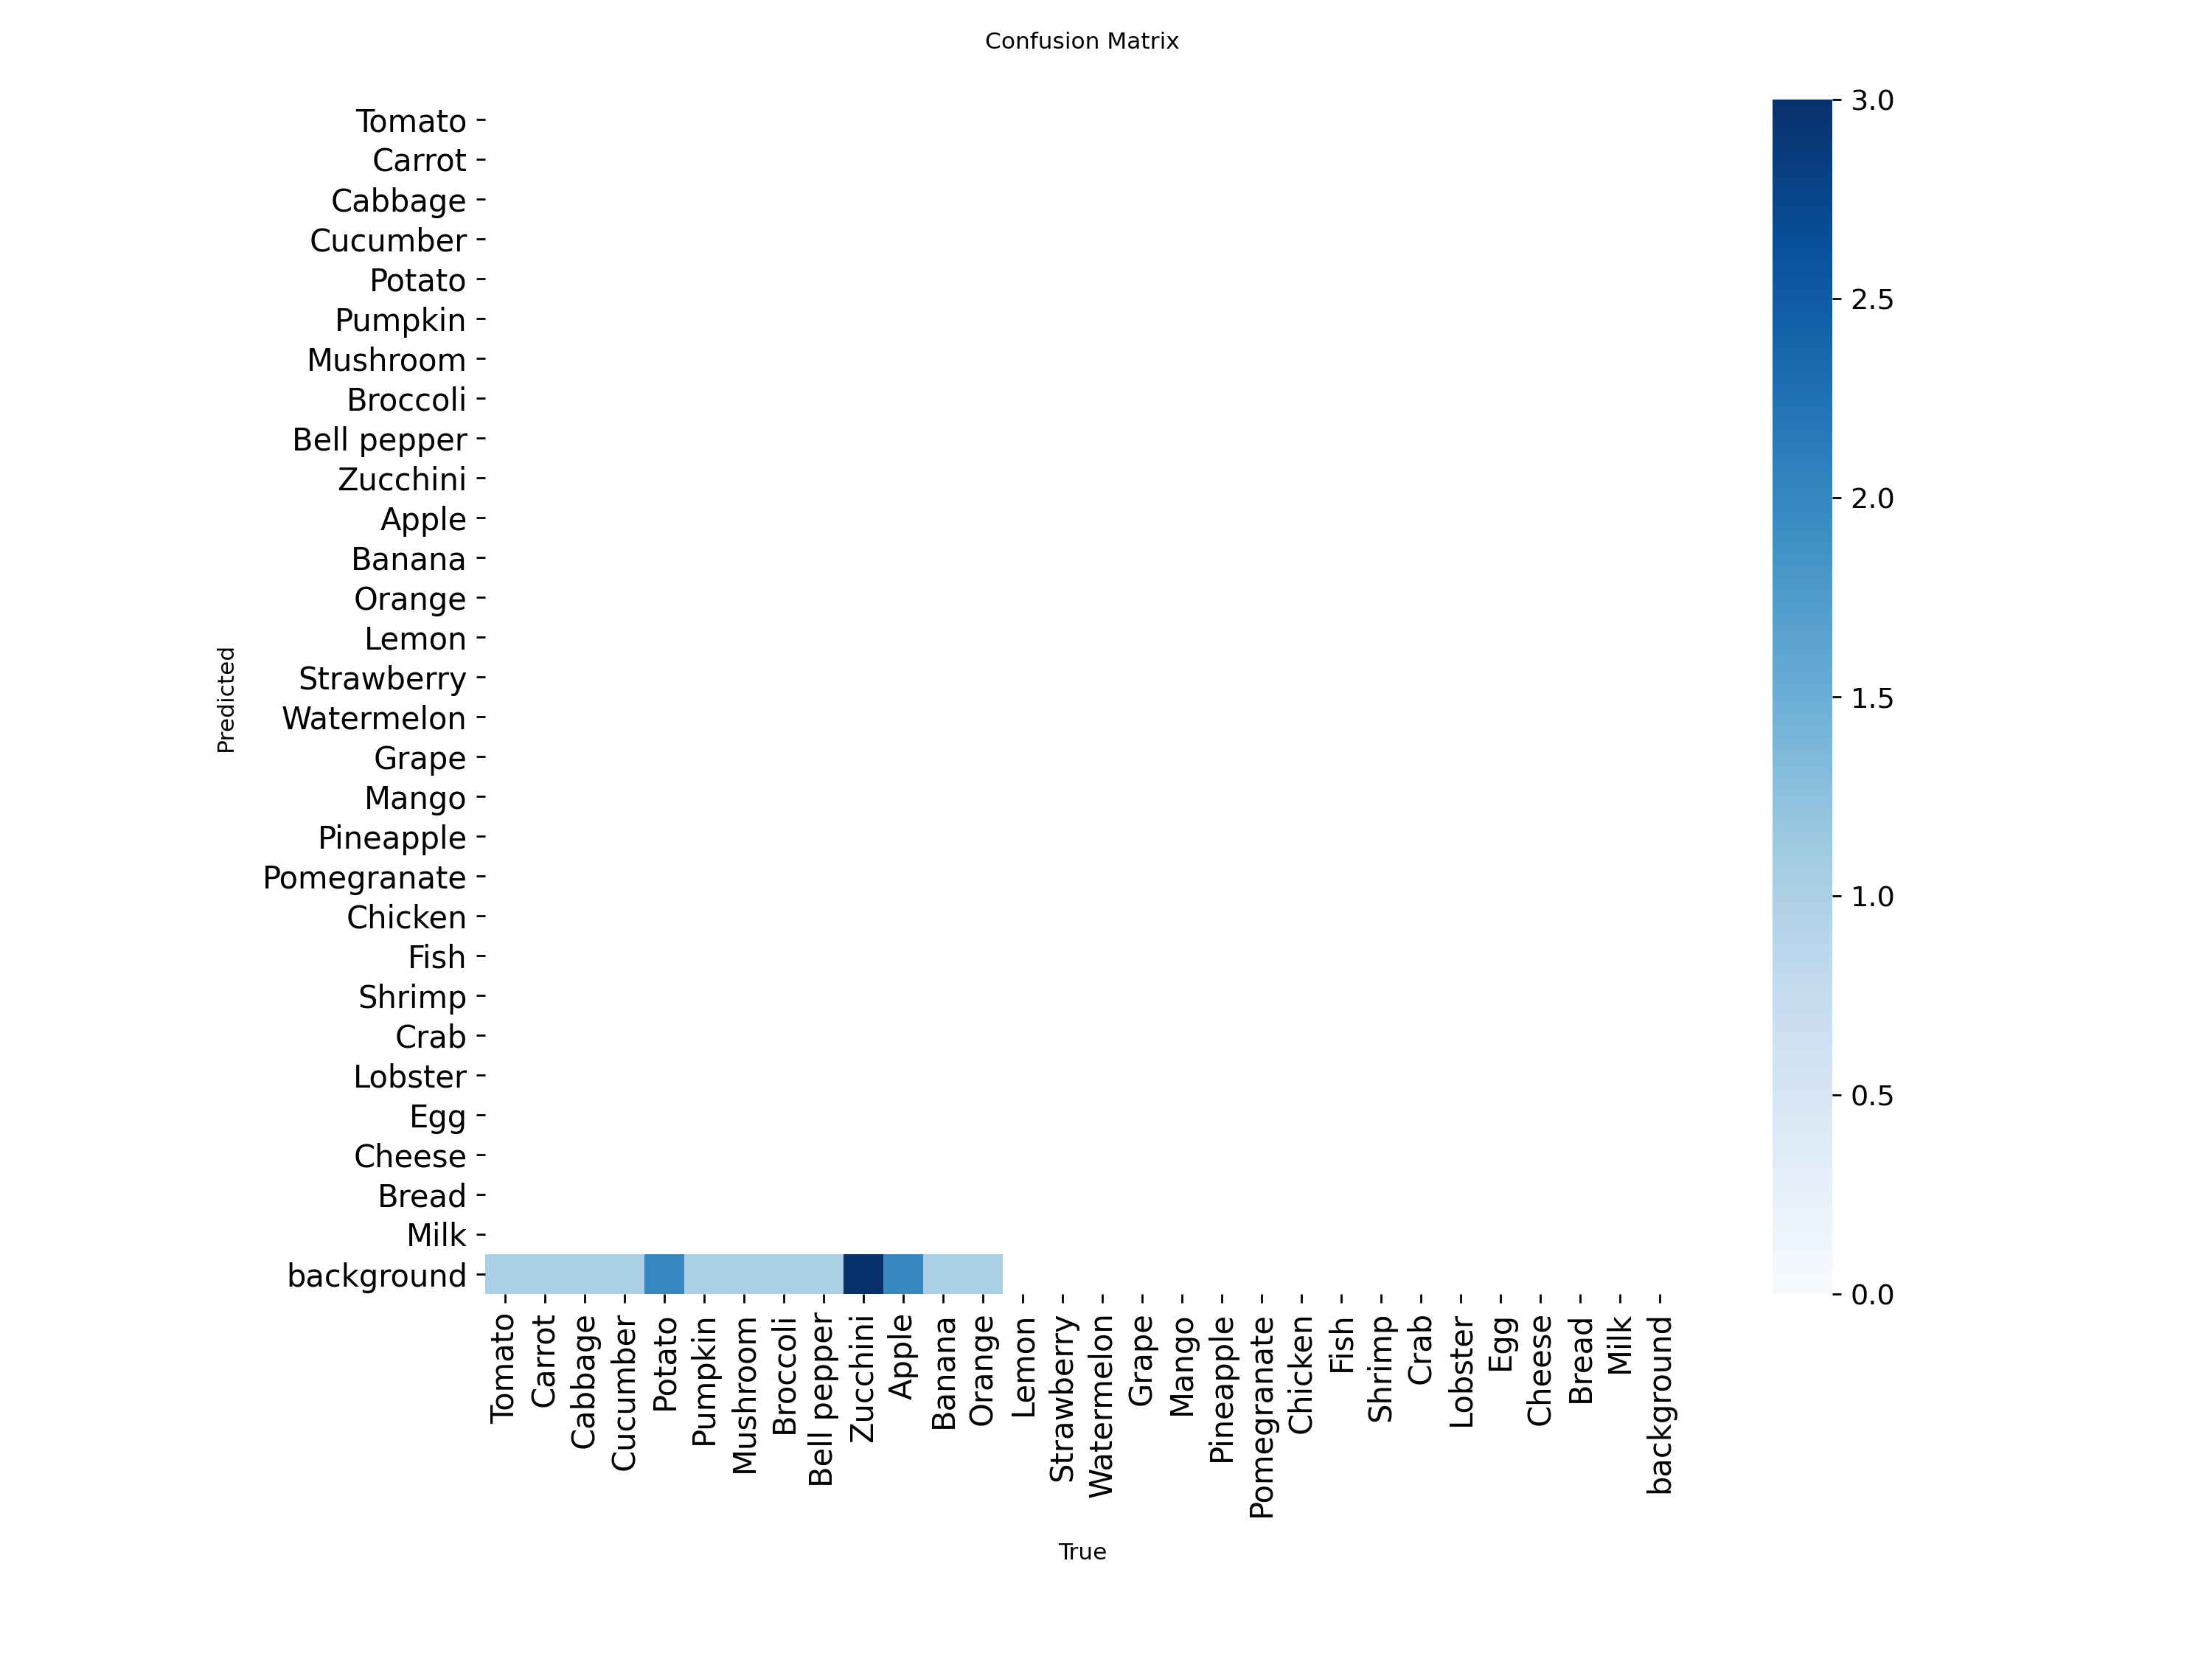


📊 Confusion Matrix (Normalized):


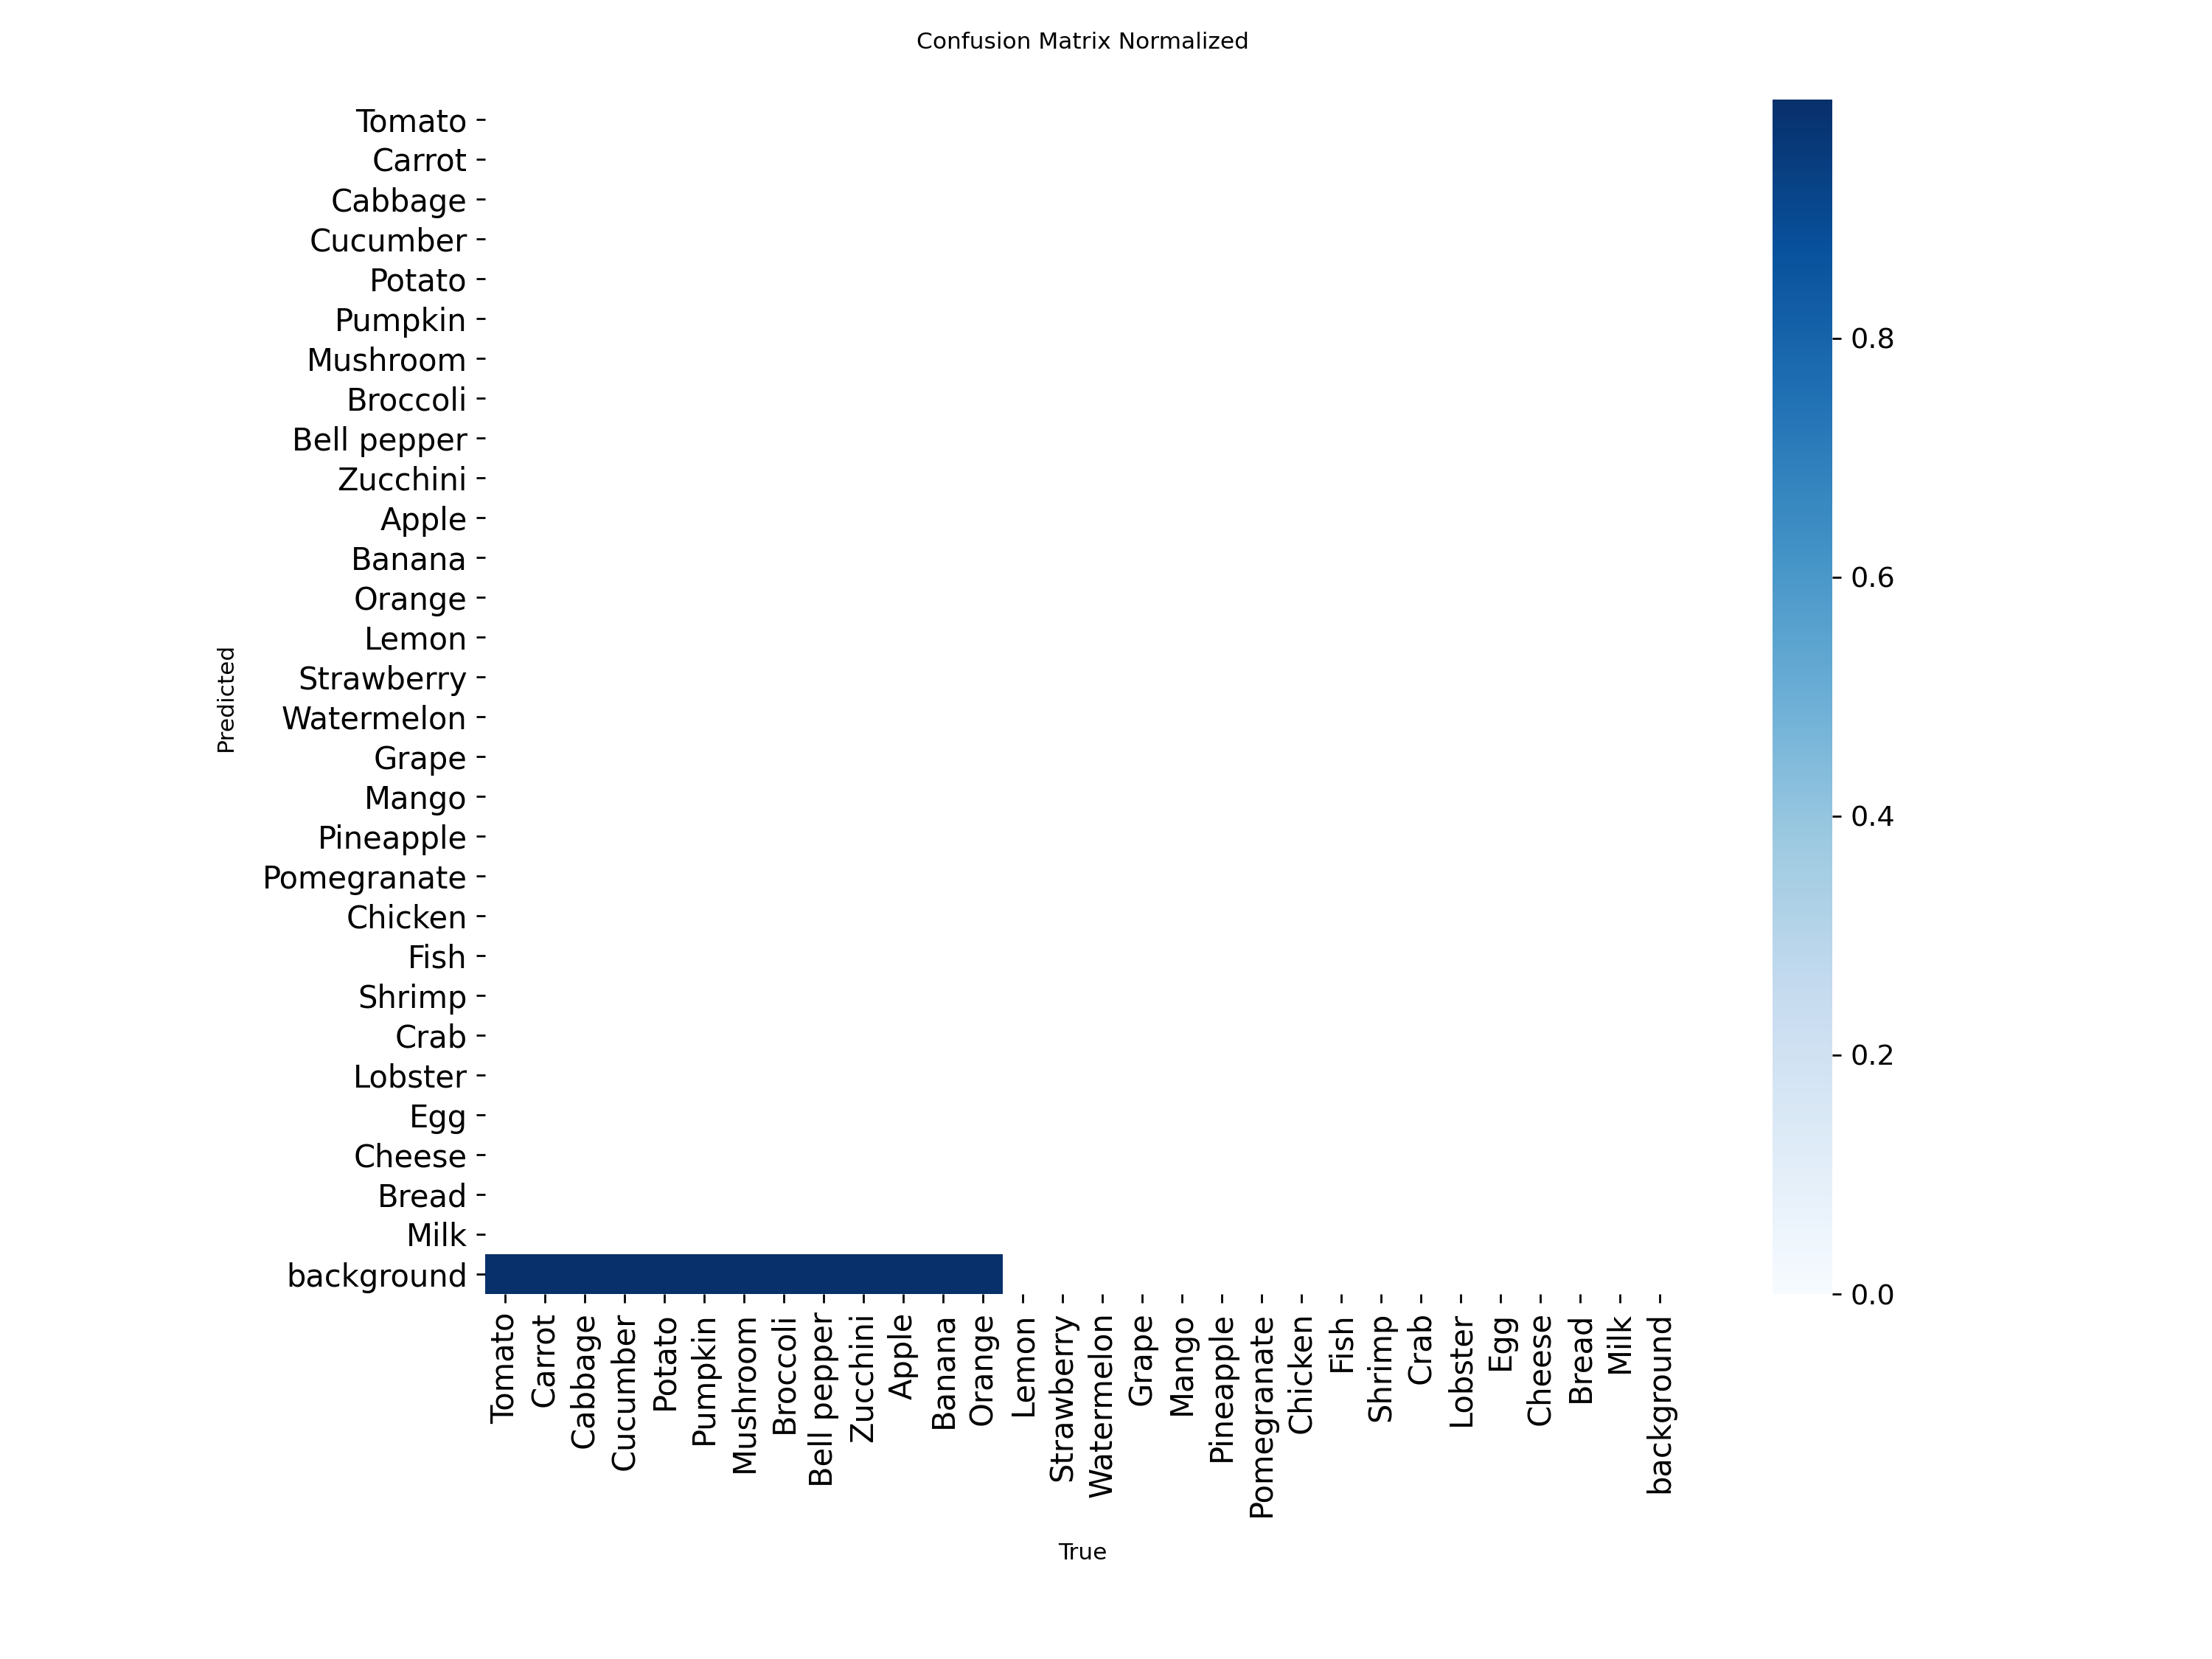


📊 Training Results:


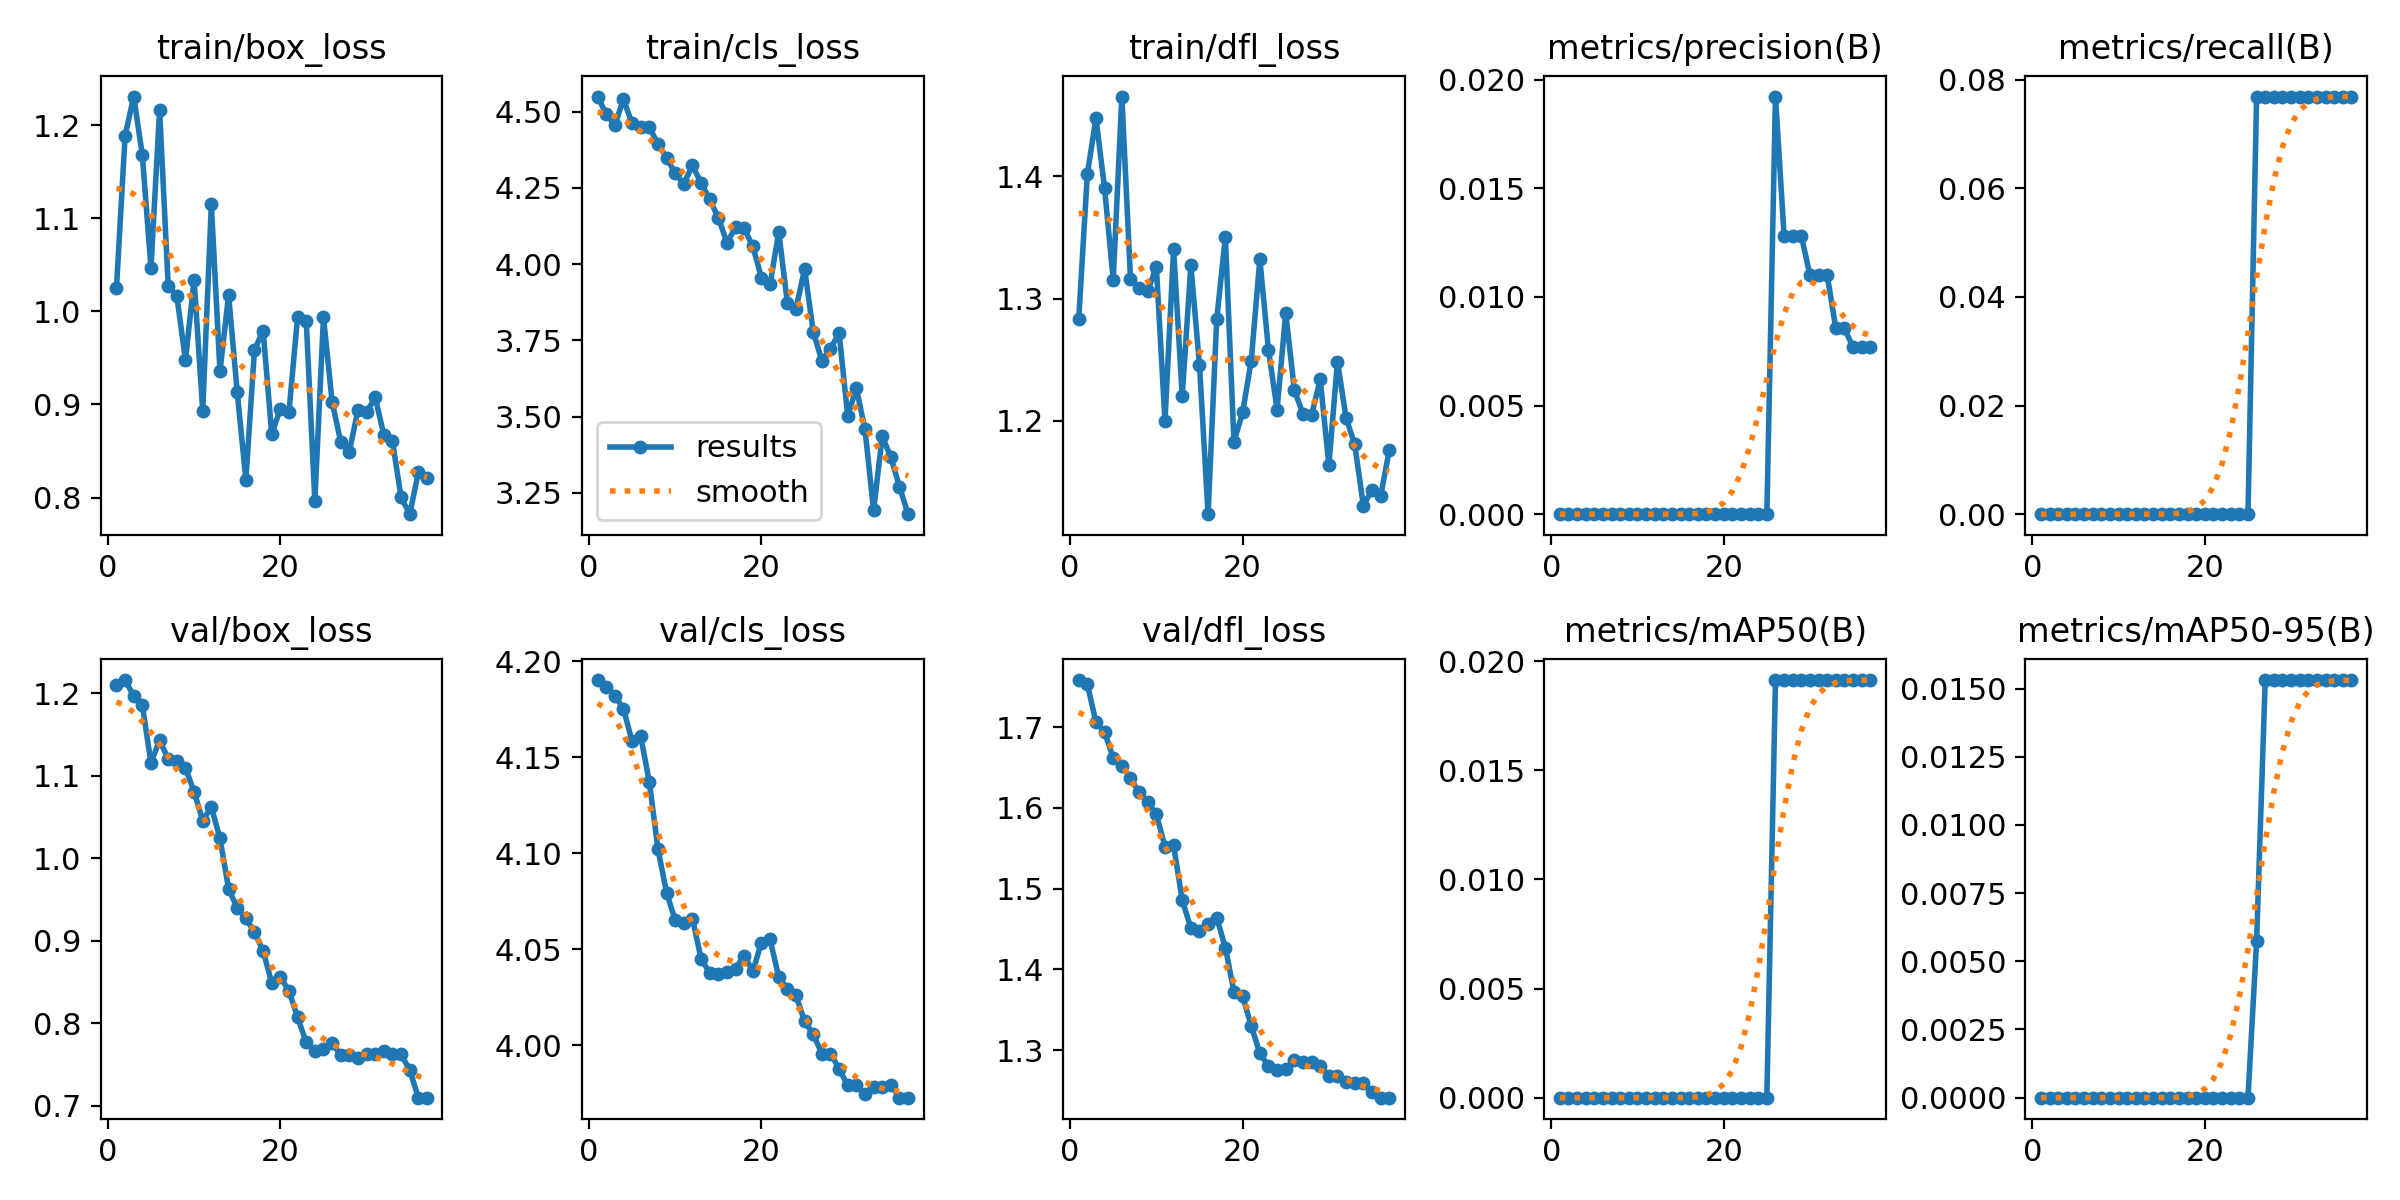


⚠️ F1 Curve (F1_curve.png) - Không tìm thấy

⚠️ PR Curve (PR_curve.png) - Không tìm thấy

⚠️ P Curve (P_curve.png) - Không tìm thấy

⚠️ R Curve (R_curve.png) - Không tìm thấy

📊 Labels:


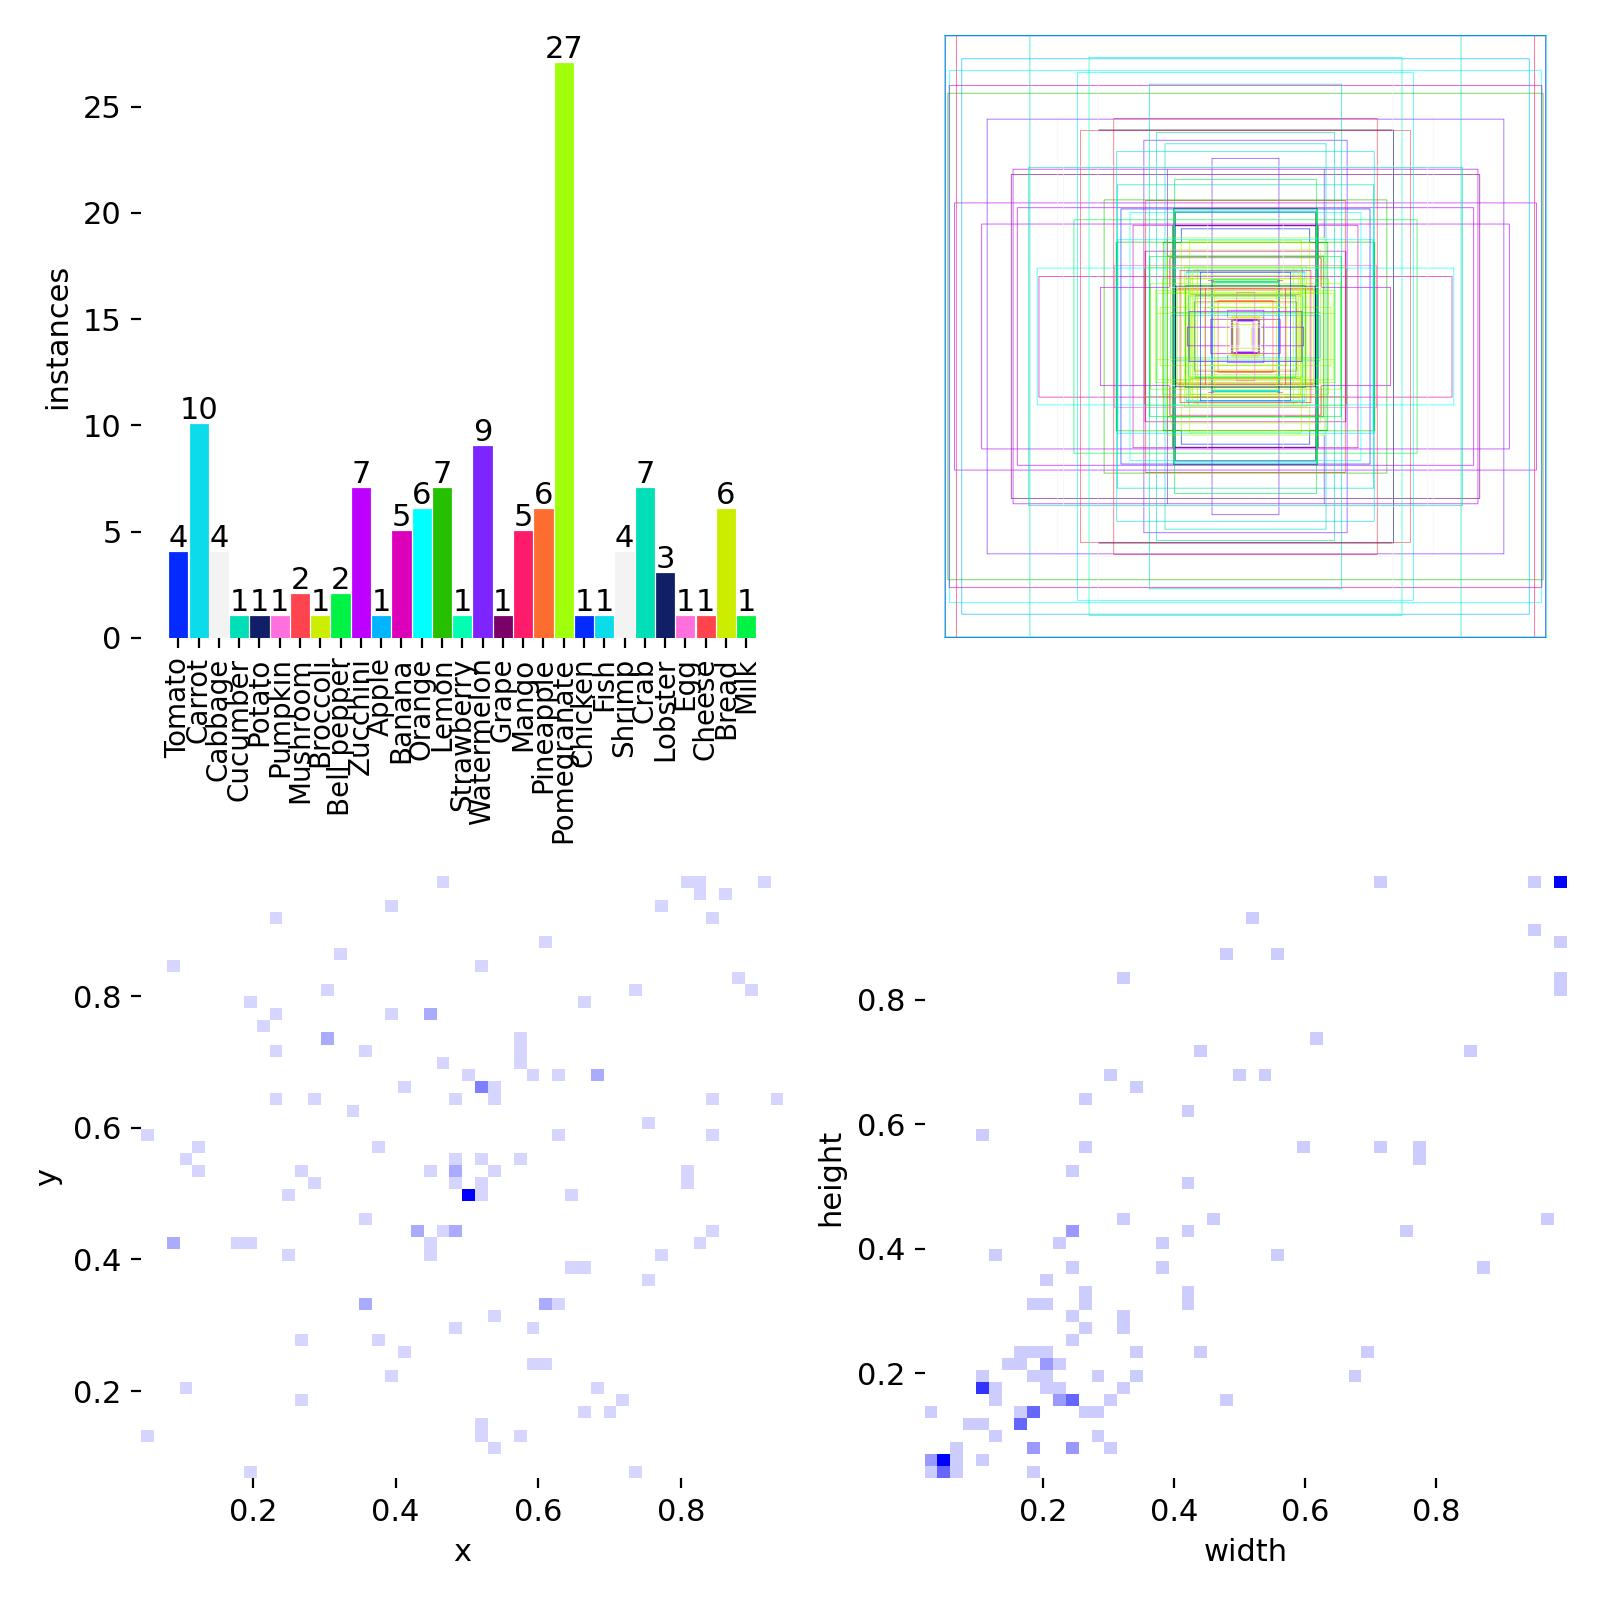


⚠️ Labels Correlogram (labels_correlogram.jpg) - Không tìm thấy

🖼️ Validation Predictions:


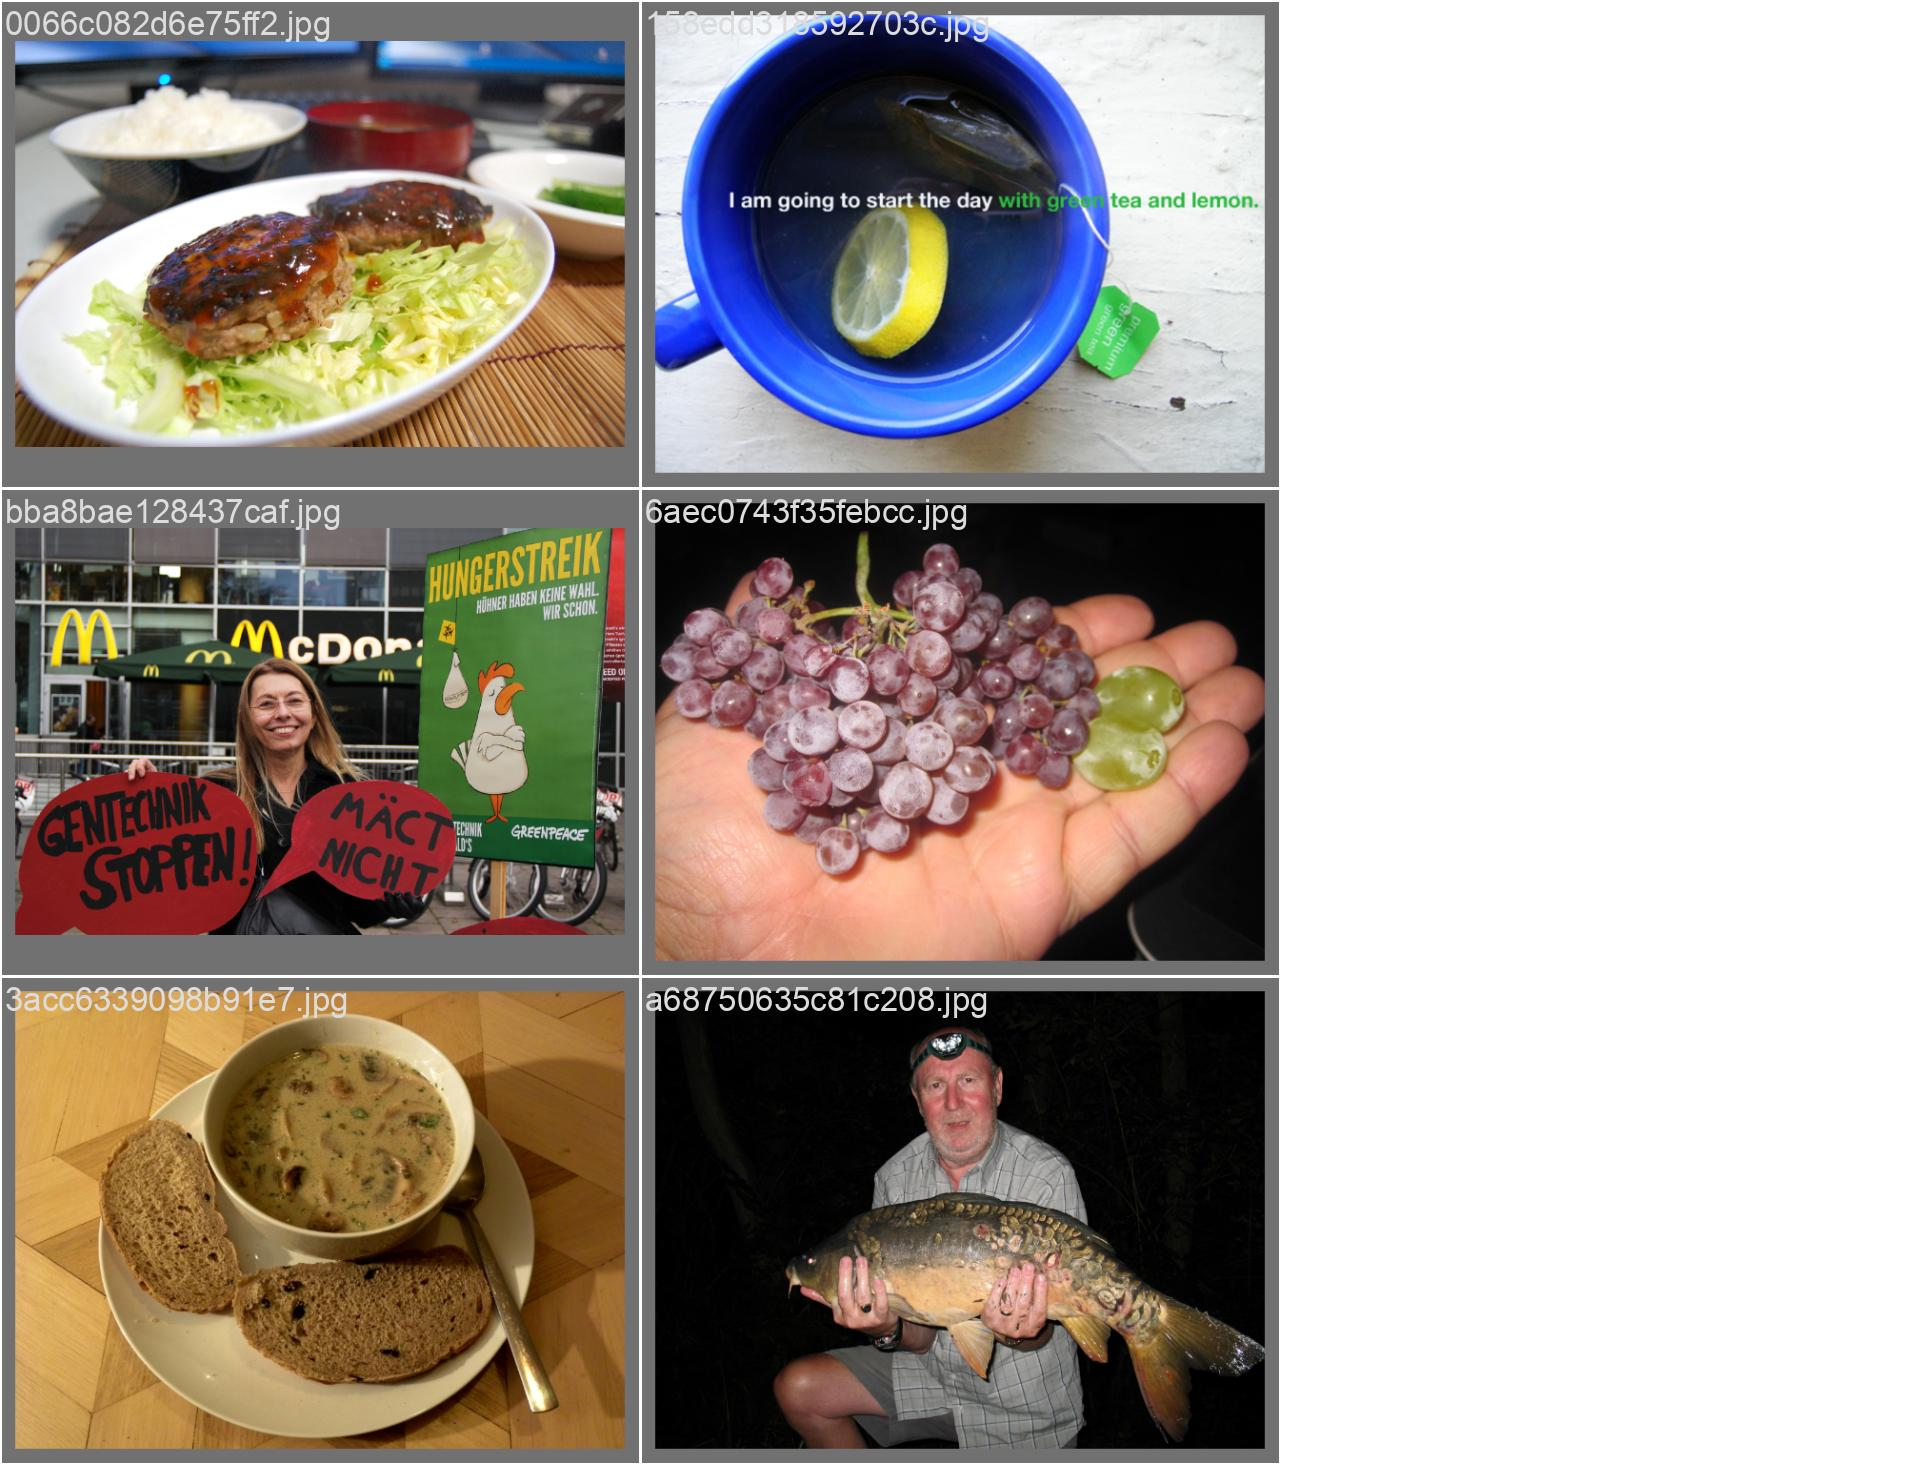

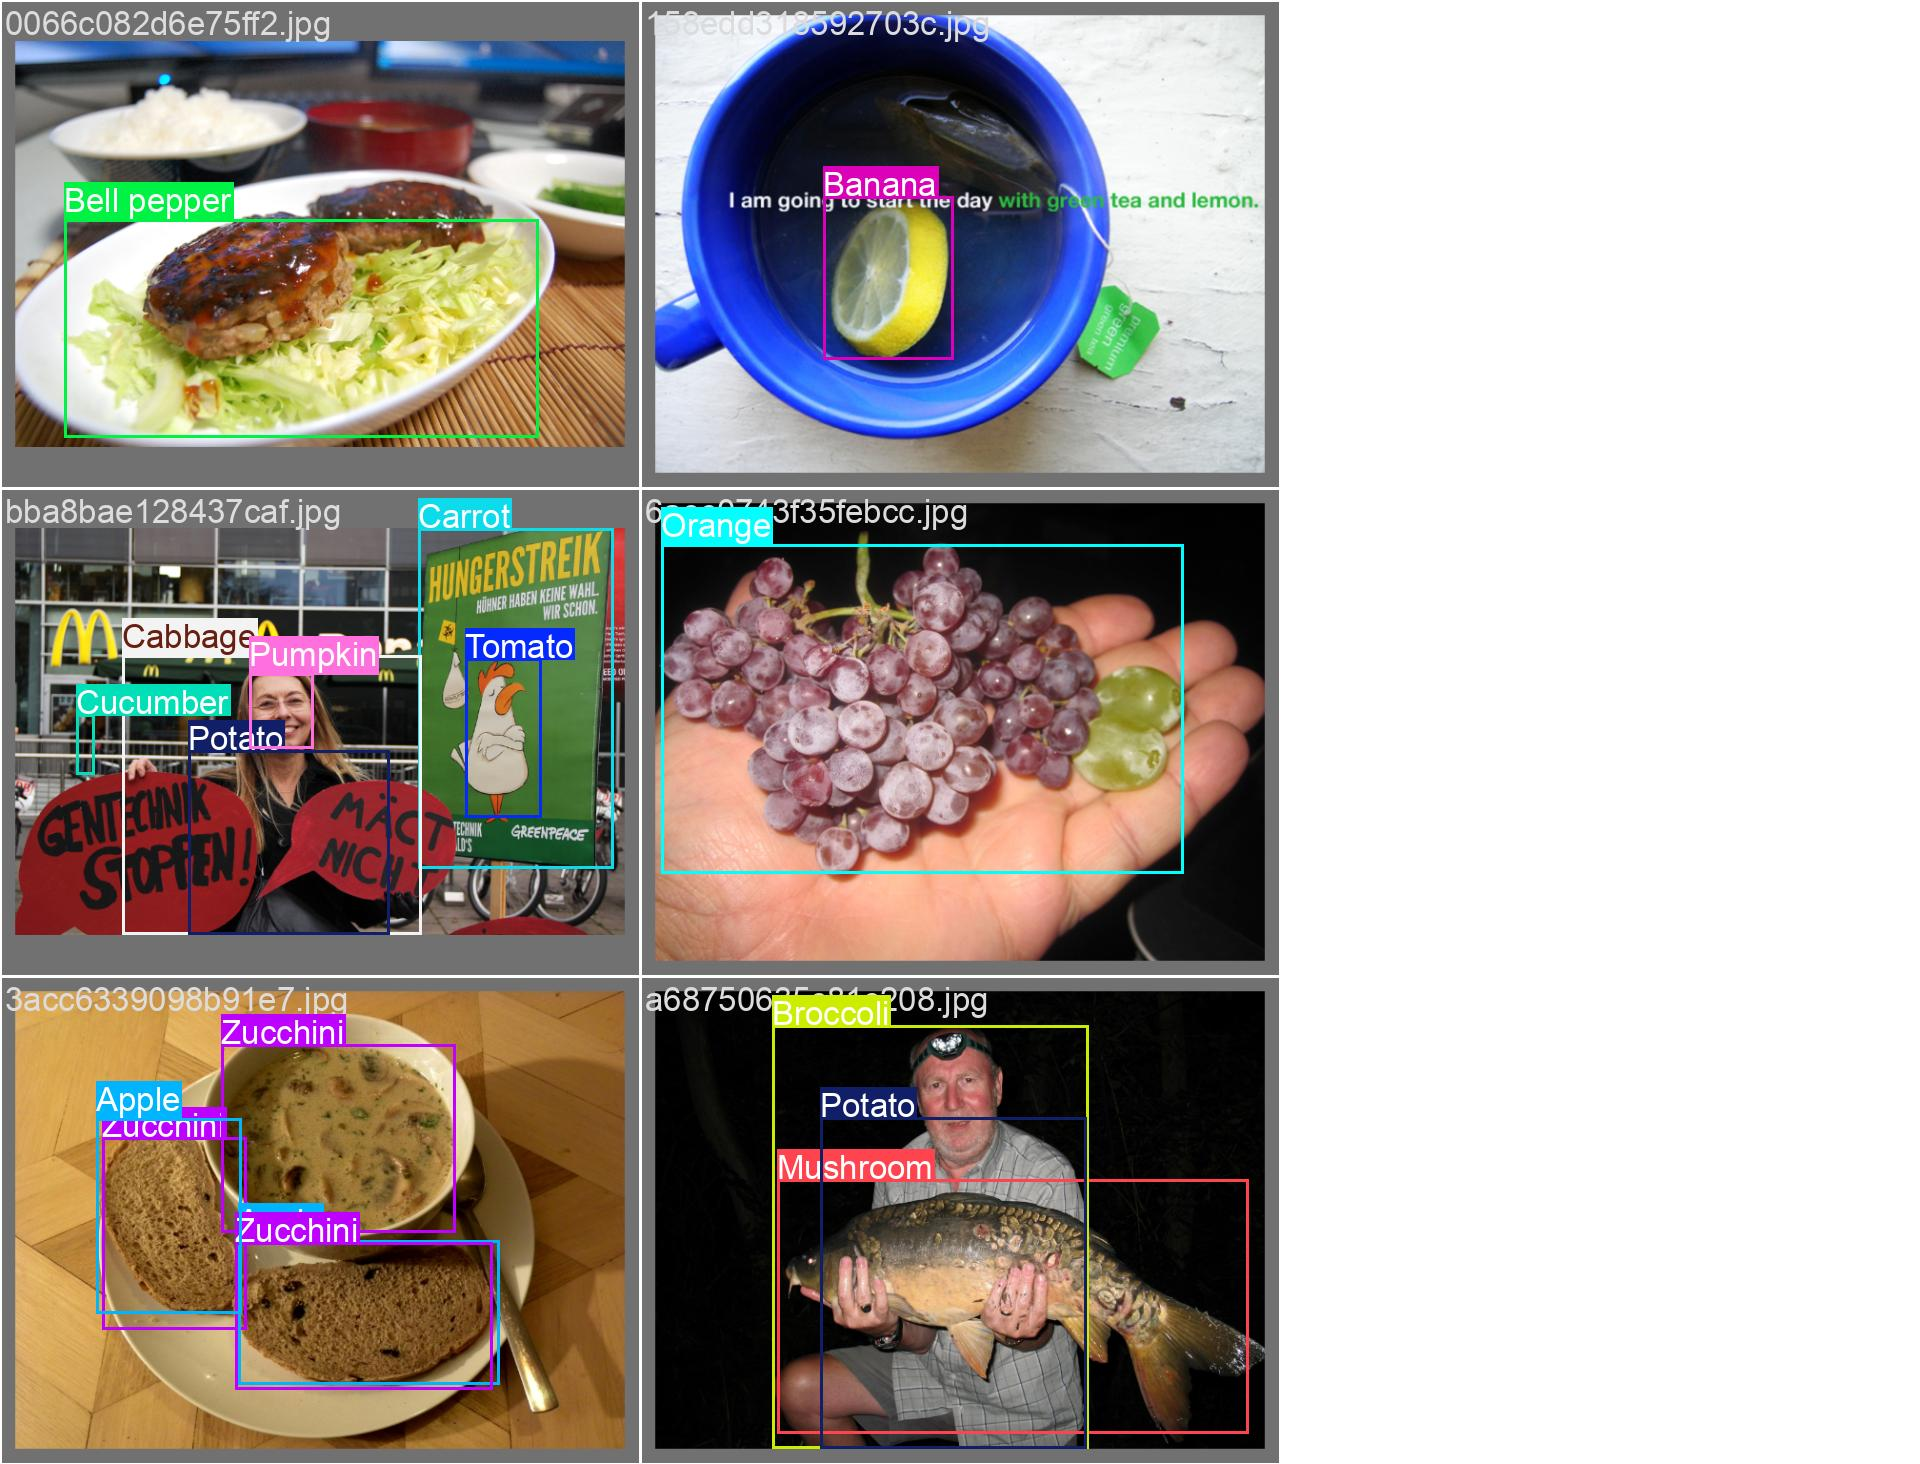

In [ ]:
# Cell 10: Xem kết quả training (FIXED)
from IPython.display import Image, display
import glob
import os

print("📊 TRAINING METRICS:\n")

# Tìm folder chính xác
base_path = 'runs/detect/food_ingredients'

# Nếu không tồn tại, tìm folder mới nhất
if not os.path.exists(base_path):
    print("🔍 Tìm folder training...")
    folders = glob.glob('runs/detect/*/')
    if folders:
        base_path = max(folders, key=os.path.getmtime).rstrip('/')
        print(f"✅ Tìm thấy: {base_path}")
    else:
        print("❌ Không tìm thấy folder training!")
        base_path = None

if base_path:
    # List tất cả file trong folder
    print(f"\n📁 Các file trong {base_path}:")
    !ls -lh {base_path}

    # Hiển thị các metrics nếu có
    metrics_files = {
        'Confusion Matrix': 'confusion_matrix.png',
        'Confusion Matrix (Normalized)': 'confusion_matrix_normalized.png',
        'Training Results': 'results.png',
        'F1 Curve': 'F1_curve.png',
        'PR Curve': 'PR_curve.png',
        'P Curve': 'P_curve.png',
        'R Curve': 'R_curve.png',
        'Labels': 'labels.jpg',
        'Labels Correlogram': 'labels_correlogram.jpg'
    }

    for title, filename in metrics_files.items():
        filepath = f'{base_path}/{filename}'
        if os.path.exists(filepath):
            print(f"\n📊 {title}:")
            display(Image(filepath, width=800))
        else:
            print(f"\n⚠️ {title} ({filename}) - Không tìm thấy")

    # Hiển thị ảnh validation predictions nếu có
    val_batch_path = f'{base_path}/val_batch*.jpg'
    val_images = glob.glob(val_batch_path)
    if val_images:
        print(f"\n🖼️ Validation Predictions:")
        for img in val_images[:3]:  # Hiển thị 3 batch đầu
            display(Image(img, width=900))
else:
    print("❌ Không thể tìm thấy folder metrics!")

In [ ]:
# Cell 11: Download model
from google.colab import files
import shutil

# Zip model và các file cần thiết
print("📦 Đang zip model...")
!zip -r food_yolo_model.zip runs/detect/food_ingredients/weights/best.pt

print("⬇️ Downloading model...")
files.download('food_yolo_model.zip')

print("✅ Hoàn tất! Giải nén file và upload lên HF Spaces!")


📦 Đang zip model...
  adding: runs/detect/food_ingredients/weights/best.pt (deflated 9%)
⬇️ Downloading model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Hoàn tất! Giải nén file và upload lên HF Spaces!
